<img src="Airbnb_Logo1.png" width="300" height="100">

### Capstone Project 
#### Project Title: Using Machine Learning to develop a recommendation system for London neighbourhoods
#### Student Name: Zinia Bhattacharya
#### Notebook 5- Modelling Part 3

-------------------------------------------

#### Summary of Modelling Part 3

In the last part of our modelling task, we ran diltilBERT sentence embedding on the full dataset of 40605 rows on the column `neighborhood_overview`.
It was computationally extremely expensive but the objective was to look at the result in its entirety. Unfortunately, this did not perform well due to the reasons noted earier about the nature of the neighborhood descriptions in the dataset.

In conclusion, word or sentence embedding is a really effective way to process and analyze text data, as long as the data is specific to the task at hand. DiltilBERT model proved very effective in clustering profiles based on ChatGPT data but fairly inconclusive on airbnb listing's neighborhood descriptions due to the significant overlap in words across all properties.

We will disregard the outcome of this exercise in our final recommendations but will retain the work done on this, for future reference

In [2]:
import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [3]:
df=joblib.load("C:\\Users\\Zinia\Documents\\capstone-project-ZiniaB\\Data\\df_suburb.pkl")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40605 entries, 0 to 71937
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      40605 non-null  int64  
 1   name                    40605 non-null  object 
 2   neighborhood_overview   40605 non-null  object 
 3   London_borough          40605 non-null  object 
 4   latitude                40605 non-null  float64
 5   longitude               40605 non-null  float64
 6   minimum_nights          40605 non-null  int64  
 7   property_type           40605 non-null  object 
 8   room_type               40605 non-null  object 
 9   price                   40605 non-null  object 
 10  review_scores_location  40605 non-null  float64
 11  suburb                  40605 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 4.0+ MB


In [8]:
import os
from sentence_transformers import SentenceTransformer
embedder= SentenceTransformer('distilbert-base-nli-mean-tokens')

In [9]:
corpus = list(df['neighborhood_overview'])

Commenting out the code below as it took over 7000 mins to run on the whole corpus.

In [10]:
# corpus_embeddings = embedder.encode(corpus)

In [11]:
# joblib.dump(corpus_embeddings,'../Data/corpus_embeddingsfulldf.pkl',compress =9)

['../Data/corpus_embeddingsfulldf.pkl']

In [31]:
corpus_embeddings =joblib.load('../Data/corpus_embeddingsfulldf.pkl')

In [12]:
from sklearn.cluster import KMeans, DBSCAN
num_clusters = 6
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

c:\Users\Zinia\anaconda3\envs\Capstone\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
cluster_df = pd.DataFrame(corpus, columns = ['corpus'])
cluster_df['cluster']=cluster_assignment
cluster_df.head(10)

,corpus,cluster
0,Finsbury Park is a friendly melting pot commun...,0
1,It is Chelsea.,4
2,"The neighbourhood ""Victoria Park Village"" is a...",0
3,We have a unique cinema called the Phoenix whi...,0
4,"Location, location, location! You won't find b...",0
5,The neighborhood of Holland Park borders Notti...,3
6,The area is called Munster village. It has a ...,2
7,It's a really safe and friendly neighbourhood....,1
8,its near Little Venice with all the canals and...,2
9,Yes Arsenal Football Stadium is a stones throw...,0


In [15]:
cluster_df.shape

(40605, 2)

In [18]:
joblib.dump(cluster_df,'../Data/cluster_df_embeddingsfull.pkl',compress =9)

['../Data/cluster_df_embeddingsfull.pkl']

In [16]:
cluster_df.groupby(['cluster'])['corpus'].value_counts()

cluster  corpus                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
0        Aside fr

In [22]:
df=joblib.load('../Data/df_suburb_clean.pkl')

In [23]:
df.index =cluster_df.index
df_suburb=pd.concat([df,cluster_df], axis =1)
df_suburb.head(20)

,id,name,neighborhood_overview,London_borough,latitude,longitude,minimum_nights,property_type,room_type,price,review_scores_location,suburb,corpus,cluster
0,13913,Holiday London DB Room Let-on going,Finsbury Park is a friendly melting pot commun...,Islington,51.568610,-0.112700,1,Private room in rental unit,Private room,$79.00,4.71000,Finsbury Park,Finsbury Park is a friendly melting pot commun...,0
1,15400,Bright Chelsea Apartment. Chelsea!,It is Chelsea.,Kensington and Chelsea,51.487800,-0.168130,10,Entire rental unit,Entire home/apt,$75.00,4.93000,Chelsea,It is Chelsea.,4
2,173082,The Residential Suite Above Gallery,"The neighbourhood ""Victoria Park Village"" is a...",Hackney,51.538254,-0.044086,2,Entire rental unit,Entire home/apt,$132.00,4.68000,Homerton,"The neighbourhood ""Victoria Park Village"" is a...",0
3,42010,You Will Save Money Here,We have a unique cinema called the Phoenix whi...,Barnet,51.585900,-0.164340,4,Private room in home,Private room,$65.00,4.72000,Hampstead Garden Suburb,We have a unique cinema called the Phoenix whi...,0
4,17402,Superb 3-Bed/2 Bath & Wifi: Trendy W1,"Location, location, location! You won't find b...",Westminster,51.521950,-0.140940,4,Entire rental unit,Entire home/apt,$425.00,4.88000,Fitzrovia,"Location, location, location! You won't find b...",0
5,42692,Fabulous flat w garden and bkfst!,The neighborhood of Holland Park borders Notti...,Hammersmith and Fulham,51.508220,-0.215620,1,Private room in rental unit,Private room,$125.00,4.75726,Brook Green,The neighborhood of Holland Park borders Notti...,3
6,43129,Quiet Comfortable Room in Fulham,The area is called Munster village. It has a ...,Hammersmith and Fulham,51.481640,-0.210820,3,Private room in townhouse,Private room,$60.00,4.66000,Parson's Green,The area is called Munster village. It has a ...,2
7,43202,Beautiful 1 bed apt in Queens Park,It's a really safe and friendly neighbourhood....,Brent,51.530310,-0.217130,4,Entire rental unit,Entire home/apt,$141.00,4.61000,Queen's Park,It's a really safe and friendly neighbourhood....,1
8,174132,Large Bedroom with EnSuite Bathroom,its near Little Venice with all the canals and...,Westminster,51.526360,-0.188010,1,Private room in rental unit,Private room,$83.00,4.89000,Maida Vale,its near Little Venice with all the canals and...,2
9,179312,Lovely 1 bed Apartment Islington on Tube Stop,Yes Arsenal Football Stadium is a stones throw...,Islington,51.551910,-0.114970,2,Entire condo,Entire home/apt,$45.00,5.00000,Lower Holloway,Yes Arsenal Football Stadium is a stones throw...,0


In [26]:
df_suburb.shape

(40605, 14)

In [29]:
df_suburb.to_csv('../Data/df_part3embedded.csv')

In [30]:
joblib.dump(df_suburb,'../Data/df_part3embedded.pkl')

['../Data/df_part3embedded.pkl']

Data visualization on Tableau below

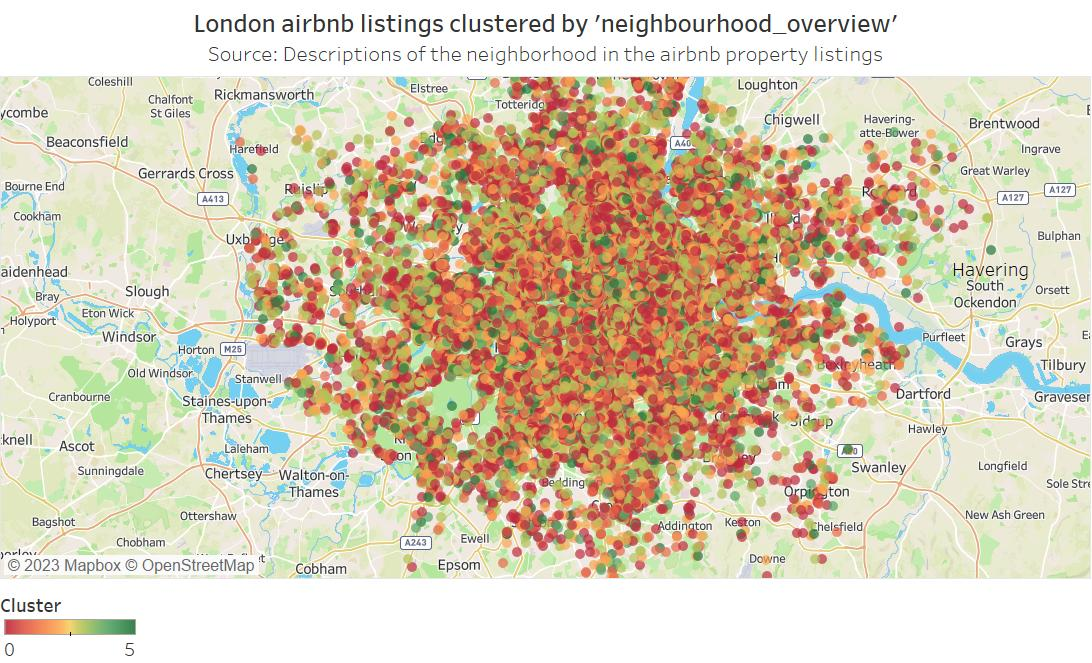

In [37]:
%matplotlib inline
from IPython.display import Image
Image("C:\\Users\\Zinia\\Documents\\capstone-project-ZiniaB\\reports\\Clustering -airbnb description.jpg")

**Conclusion**<br>
As mentioned at the beginnning, the model didn't prove effective in identifying distinct clusters and will be diregarded for our recommendation task.
Sentence-embedding and KMeans on ChatGPT neighborhood profiles proved most effective and as next steps, we will fine-tune and expand that model to include all suburbs, beyond the Top100 for  the complete neighbourhood recommender system for airbnb London

____________________________________